In [63]:
import sys
sys.path.insert(0,'C:\\code\\masters_thesis\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import cvxpy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12})
plt.rc('axes', xmargin=0, ymargin=0.1)
import matplotlib.ticker as ticker
import array_to_latex as a2l

"""
Own packages
"""

from codelib.population_parameters import corr_to_cov_matrix, project_logreturns_dist_params, calculate_mu_linear_returns, calculate_cov_mat_linear_returns, cov_to_corr_and_vols, cov_to_corr_matrix, calculate_mu_and_vols_pc, eig_decomp
from codelib.portfolio_measures import portfolio_mean, portfolio_variance, portfolio_std, calculate_marginal_risks_std, calculate_marginal_sharpe, calculate_pc_var_contributions
from codelib.portfolio_performance_measures import sharpe_ratio, calculate_sharpe_ratio
from codelib.portfolio_optimizers import calculate_max_sharpe_portfolio, calculate_min_var_portfolio, tangency_portfolio, minimum_variance_portfolio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
"""
Define three random assets
"""
corr = np.array([[1.0, 0.9, 0.7],
                 [0.9, 1.0, 0.4],
                 [0.7, 0.4, 1.0]])


vols = np.array([0.2, 0.15, 0.1])

rf = 0.005
#mu = vols * 0.2 # constant Sharpe ratio
mu = np.array([0.02, 0.02, 0.01])

# transform to covariance matrix using previously defined function (imported at the top of the notebook)
cov_mat = corr_to_cov_matrix(corr, vols)

In [80]:
# calcualte min-var port. og tangency port

w_mv = minimum_variance_portfolio(cov_mat)
w_msr = tangency_portfolio(cov_mat, mu, rf=rf)

# calculate mu and vol of min-var and tangency and calculate efficient frontier (without risk-free asset)
mu_mv = portfolio_mean(w_mv, mu)
std_mv = portfolio_std(w_mv, cov_mat)
mu_max_sr = portfolio_mean(w_msr, mu)
std_max_sr = portfolio_std(w_msr, cov_mat)

# efficient portfolios
alpha = np.linspace(-5.0, 1.0, 1000)

w_eff = w_mv[:, None] * alpha[None, :] + w_msr[:, None] * (1-alpha[None, :])

std_eff = np.apply_along_axis(portfolio_std, 0, w_eff, (cov_mat))
mu_eff = np.apply_along_axis(portfolio_mean, 0, w_eff, (mu))

In [81]:
"""
calcualte random portfolios and their returns and vols
"""

random_ports = np.random.uniform(low=-1,high=1,size=(1000, 3))
random_ports = (random_ports.T / random_ports.sum(axis=1)).T
mu_random_ports = np.apply_along_axis(portfolio_mean, 1, random_ports, mu)
std_random_ports = np.apply_along_axis(portfolio_std, 1, random_ports, cov_mat)

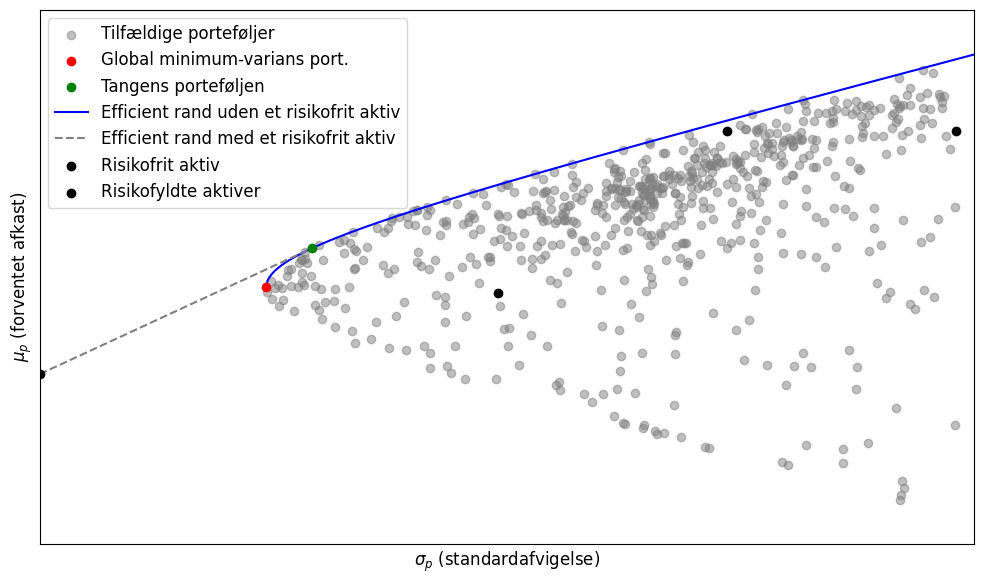

In [86]:
"""
Plot the efficient frontier
"""

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(std_random_ports[std_random_ports<0.2], mu_random_ports[std_random_ports<0.2], label="Tilfældige porteføljer", color="gray", zorder=0, alpha=0.5)
ax.scatter(std_mv, mu_mv, label="Global minimum-varians port.", color='red', zorder=10)
ax.scatter(std_max_sr, mu_max_sr, label="Tangens porteføljen",color="green", zorder=10)
ax.plot(std_eff, mu_eff,color='blue', label="Efficient rand uden et risikofrit aktiv")
ax.plot([0.0, std_max_sr], [rf, mu_max_sr], color="gray", linestyle="--", label="Efficient rand med et risikofrit aktiv")
ax.scatter(0, rf, color="black", label="Risikofrit aktiv", zorder=10)
ax.scatter(vols, mu, color="black", label="Risikofyldte aktiver", zorder=10)
#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

ax.set_xlabel("$\sigma_p$ (standardafvigelse)")
ax.set_ylabel("$\mu_p$ (forventet afkast)")

ax.legend()
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.tight_layout()
plt.savefig("efficient_frontiers.jpg",bbox_inches="tight",dpi=300)
plt.show()